Source Link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

SMOTE : Synthetic Minority Oversampling Technique

In [126]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'OverSampling&UnderSampling 1.ipynb']


To install required package Run the code syntax on terminal,
    
pip install imbalanced-learn==0.11.0

In [127]:
import imblearn
print(imblearn.__version__)

0.11.0


In [128]:
from collections import Counter
from sklearn.datasets import make_blobs, make_classification
from matplotlib import pyplot
from numpy import where

In [129]:
X, y = make_blobs(n_samples=10000, 
                  n_features=10
                 )
print(X.shape, y.shape)

(10000, 10) (10000,)


In [130]:
set(y)

{0, 1, 2}

In [131]:
counter = Counter(y)
print(counter)

Counter({0: 3334, 1: 3333, 2: 3333})


In [132]:
import pandas as pd
pd.DataFrame(y).value_counts()

0    3334
1    3333
2    3333
dtype: int64

In [133]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
print(X.shape, y.shape)

(10000, 2) (10000,)


In [134]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [135]:
import pandas as pd
pd.DataFrame(y).value_counts()

0    9900
1     100
dtype: int64

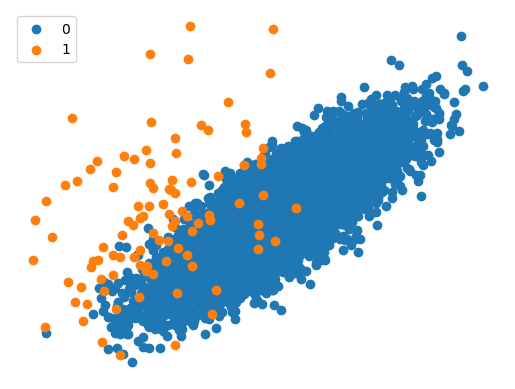

In [136]:
counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.axis("off")
pyplot.show()

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
oversample = SMOTE(sampling_strategy=0.1)
X_, y_ = oversample.fit_resample(X, y)

In [139]:
import pandas as pd
pd.DataFrame(y_).value_counts()

0    9900
1     990
dtype: int64

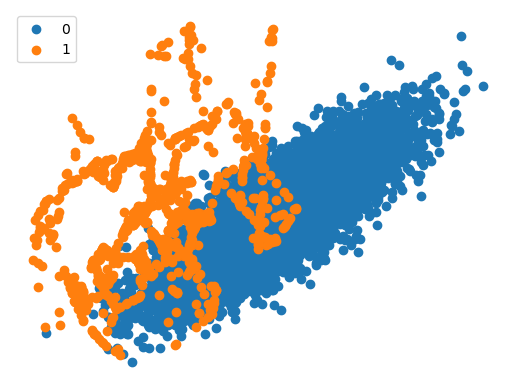

In [140]:
counter = Counter(y_)
for label, _ in counter.items():
    row_ix = where(y_ == label)[0]
    pyplot.scatter(X_[row_ix, 0], X_[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.axis("off")
pyplot.show()

In [141]:
from imblearn.under_sampling import RandomUnderSampler

In [142]:
under = RandomUnderSampler(sampling_strategy=0.99)
X_, y_ = under.fit_resample(X, y)

In [143]:
import pandas as pd
pd.DataFrame(y_).value_counts()

0    101
1    100
dtype: int64

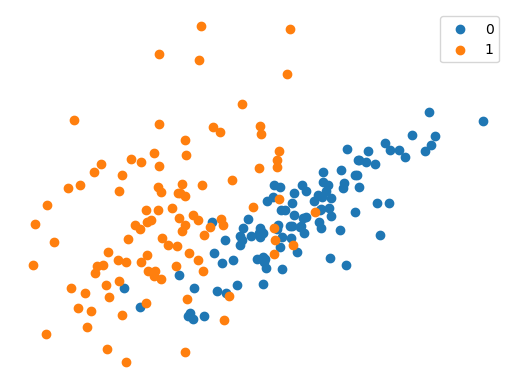

In [144]:
counter = Counter(y_)
for label, _ in counter.items():
    row_ix = where(y_ == label)[0]
    pyplot.scatter(X_[row_ix, 0], X_[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.axis("off")
pyplot.show()

In [145]:
from imblearn.pipeline import Pipeline

In [146]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [147]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [148]:
X_, y_ = pipeline.fit_resample(X, y)

In [149]:
import pandas as pd
pd.DataFrame(y_).value_counts()

0    1980
1     990
dtype: int64

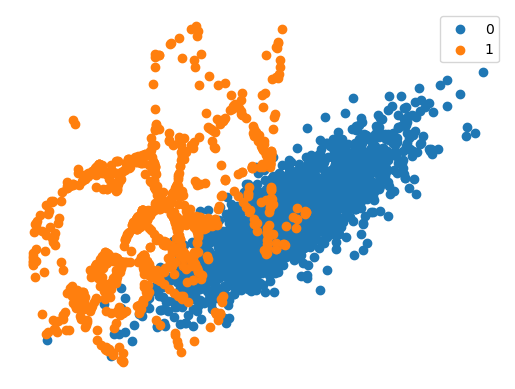

In [150]:
counter = Counter(y_)
for label, _ in counter.items():
    row_ix = where(y_ == label)[0]
    pyplot.scatter(X_[row_ix, 0], X_[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.axis("off")
pyplot.show()

In [151]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1, 
                           weights=[0.99], 
                           flip_y=0, 
                           random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


In [152]:
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.834


In [153]:
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.838


                                                    -:END:-